In [1]:
import pandas as pd

#### Загрузить данные в pandas по url=https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
df = pd.read_csv(url, sep='\t')

#### 1. Вывести: кол-во наблюдений в датасете

In [3]:
print(df.shape[0])

4622


#### 2. Вывести названия столбцов

In [4]:
print(*df.columns, sep=', ')

order_id, quantity, item_name, choice_description, item_price


#### 3. Определить самую частую позицию (item) в заказе

In [5]:
df.groupby('item_name')['item_name'].count().idxmax()

'Chicken Bowl'

#### 4. Построить гистрограмму частоты заказов по позициям (item )

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (20, 8)

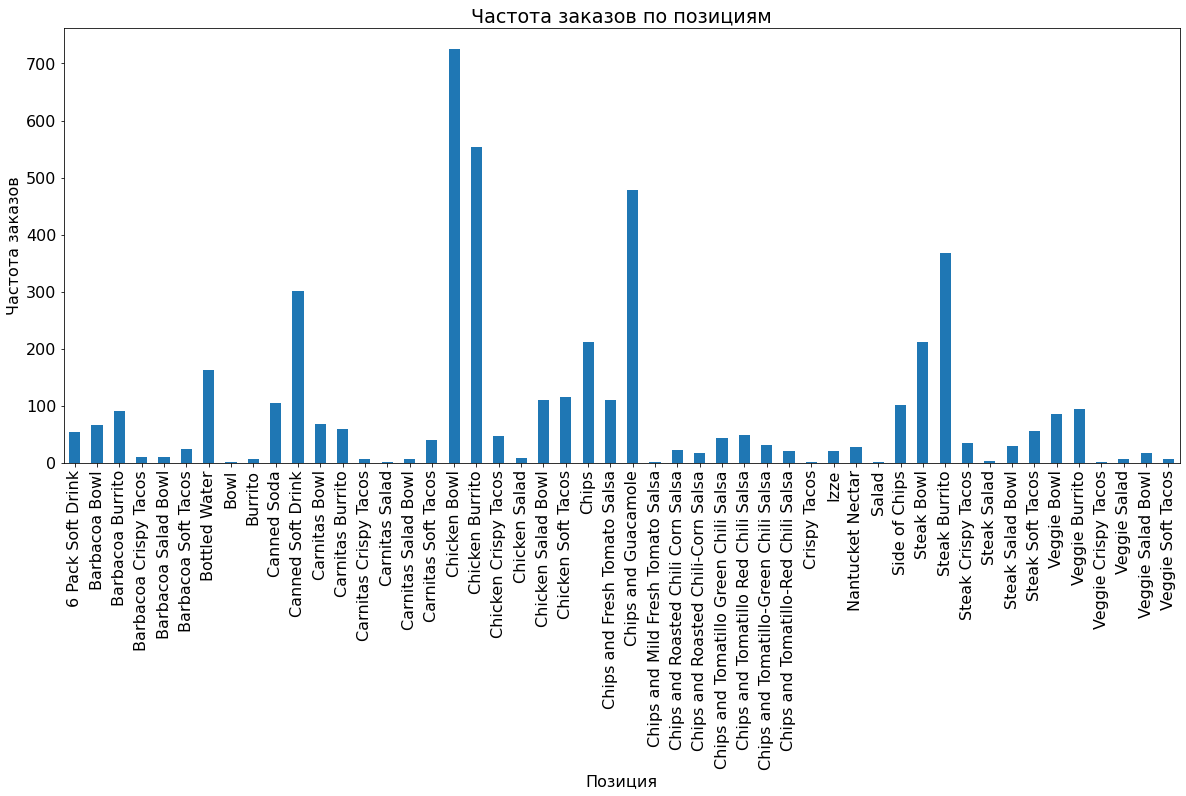

In [7]:
df.groupby('item_name')['item_name'].count().plot(kind='bar')
plt.xlabel('Позиция')
plt.ylabel('Частота заказов')
plt.title('Частота заказов по позициям')
plt.show()

#### 5. Измените тип переменной item_price c с помощью лямбды функции

In [8]:
if df.item_price.dtype != 'float':
    print('BEFORE: ', df.item_price.dtype)
    df['item_price'] = df['item_price'].apply(lambda row: float(row[1:]))
    print('AFTER: ', df.item_price.dtype)
else:
    print('Type is already float')

BEFORE:  object
AFTER:  float64


#### 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)

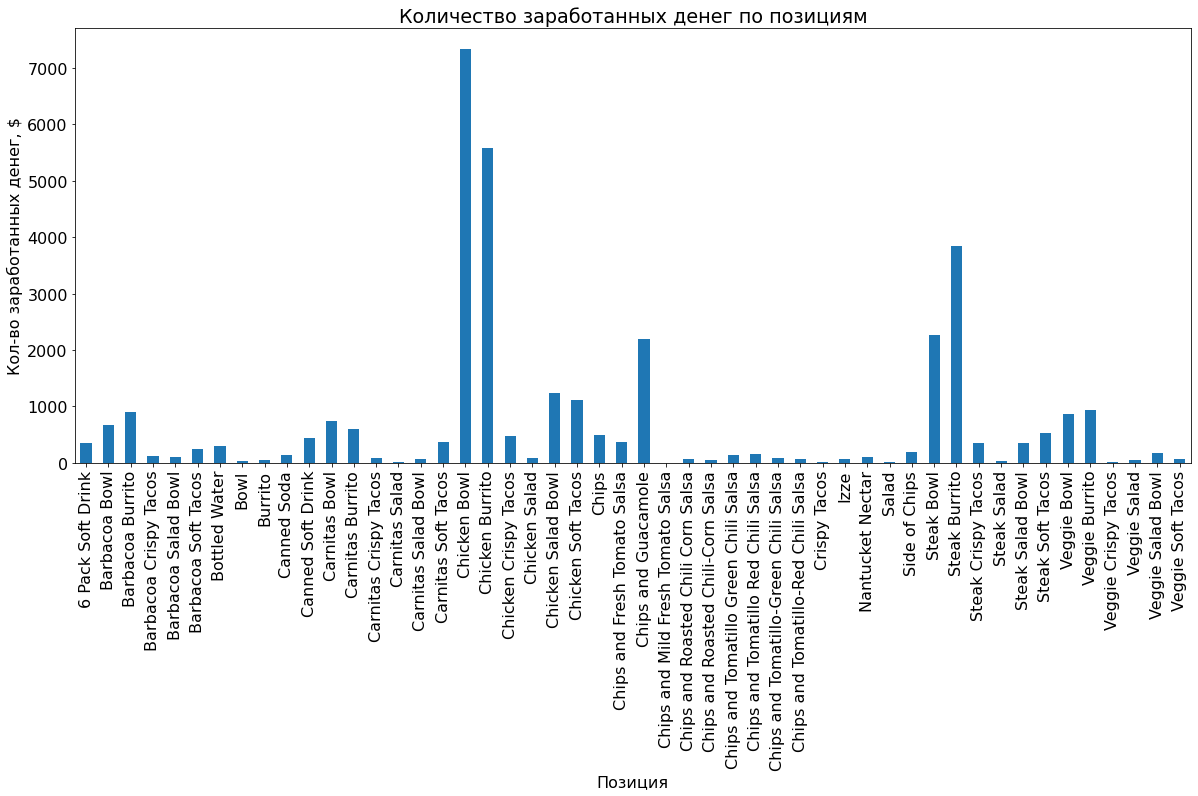

In [9]:
df.groupby('item_name')['item_price'].sum().plot(kind='bar')
plt.xlabel('Позиция')
plt.ylabel('Кол-во заработанных денег, $')
plt.title('Количество заработанных денег по позициям')
plt.show()

#### 7. Средняя сумма заказа? (минимум 2 способа)

In [10]:
print("First way: ", round(df.groupby('order_id')['item_price'].sum().mean(), 2))
print("Second way: ", round(df['item_price'].sum() / len(df.groupby('order_id')['order_id'].count()), 2))

First way:  18.81
Second way:  18.81


#### 8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе

In [11]:
df.groupby('order_id')['item_name'].nunique().reset_index().agg({'item_name': ['mean', 'min', 'median', 'max']})

,item_name
mean,2.34024
min,1.00000
median,2.00000
max,8.00000


#### 9. Определить статистику заказов стейков, а также статистику заказов прожарки.

In [12]:
steaks = df[df['item_name'].str.contains("Steak")]
steaks[["quantity", "item_price"]].describe()

,quantity,item_price
count,702.000000,702.000000
mean,1.045584,10.518889
std,0.228314,2.566743
min,1.000000,8.690000
25%,1.000000,8.990000
50%,1.000000,9.250000
75%,1.000000,11.750000
max,3.000000,27.750000


In [13]:
roasting = df[df['choice_description'].str.contains("Mild|Medium|Hot", na=False)]
roasting[["quantity", "item_price"]].describe()

,quantity,item_price
count,783.000000,783.000000
mean,1.054917,9.772031
std,0.238920,2.588239
min,1.000000,8.190000
25%,1.000000,8.490000
50%,1.000000,8.990000
75%,1.000000,10.980000
max,3.000000,32.940000


#### 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.

In [14]:
df['item_price_rubles'] = round(df.item_price * 74.67, 2)
df.head()

,order_id,quantity,item_name,choice_description,item_price,item_price_rubles
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,178.46
1,1,1,Izze,[Clementine],3.39,253.13
2,1,1,Nantucket Nectar,[Apple],3.39,253.13
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,178.46
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,1267.90


#### 11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.

In [15]:
df.groupby('order_id').agg({'item_name': lambda df: ", ".join(df), 'item_price': 'sum', 'quantity': 'sum'}).reset_index()

,order_id,item_name,item_price,quantity
0,1,"Chips and Fresh Tomato Salsa, Izze, Nantucket ...",11.56,4
1,2,Chicken Bowl,16.98,2
2,3,"Chicken Bowl, Side of Chips",12.67,2
3,4,"Steak Burrito, Steak Soft Tacos",21.00,2
4,5,"Steak Burrito, Chips and Guacamole",13.70,2
...,...,...,...,...
1829,1830,"Steak Burrito, Veggie Burrito",23.00,2
1830,1831,"Carnitas Bowl, Chips, Bottled Water",12.90,3
1831,1832,"Chicken Soft Tacos, Chips and Guacamole",13.20,2
1832,1833,"Steak Burrito, Steak Burrito",23.50,2


In [16]:
steaks.groupby('order_id').agg({'item_name': lambda df: ", ".join(df), 'item_price': 'sum', 'quantity': 'sum'}).reset_index()

,order_id,item_name,item_price,quantity
0,4,"Steak Burrito, Steak Soft Tacos",21.00,2
1,5,Steak Burrito,9.25,1
2,16,Steak Burrito,8.99,1
3,20,Steak Burrito,11.75,1
4,21,Steak Burrito,8.99,1
...,...,...,...,...
607,1810,Steak Crispy Tacos,11.75,1
608,1818,Steak Salad Bowl,9.39,1
609,1829,Steak Burrito,11.75,1
610,1830,Steak Burrito,11.75,1


#### 12. Определить цену по каждой позиции в отдельности. 

In [17]:
df['item_cost'] = round(df.item_price/df.quantity, 2)
df.groupby('item_name').agg({'item_cost': lambda x: x.unique()})

,item_cost
item_name,
6 Pack Soft Drink,6.49
Barbacoa Bowl,"[11.75, 9.25, 8.99, 11.48, 8.69, 11.49]"
Barbacoa Burrito,"[8.99, 9.25, 11.75, 11.08, 8.69, 11.48]"
Barbacoa Crispy Tacos,"[11.75, 9.25, 11.48, 8.99]"
Barbacoa Salad Bowl,"[11.89, 9.39]"
Barbacoa Soft Tacos,"[9.25, 8.99, 11.75, 11.48]"
Bottled Water,"[1.09, 1.5]"
Bowl,7.4
Burrito,7.4
